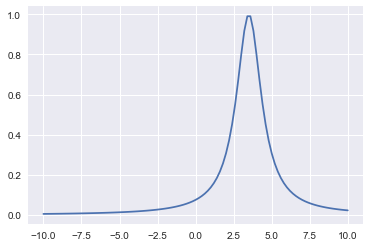

In [19]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

offsets=np.linspace(-10,10,101)
A=1.0
W=2.0
x0=3.5

def Lorentzian(xdata,Amp,width,center):
    width= (width**2)/4
    xdata=(xdata-center)**2
    S=  (Amp * width) / (width + xdata)
    return S

signal=Lorentzian(offsets,A,W,x0)

plt.plot(offsets,signal)
plt.show()

In [26]:
from scipy.optimize import curve_fit
x_initial=[1,2,.3]
pars_hat, cov = curve_fit(Lorentzian, offsets, signal,p0=x_initial,bounds=(0, 4.0))

print(pars_hat)

[ 1.   2.   3.5]


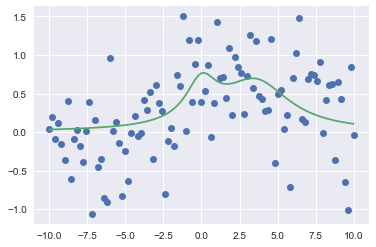

In [39]:
def Lsum2(xdata,a1,w1,c1,a2,w2,c2):
    L1=Lorentzian(xdata,a1,w1,c1)
    L2=Lorentzian(xdata,a2,w2,c2)
    return L1 + L2   

Lobs=Lsum2(offsets,.7,2,0,.9,5,3) + np.random.normal(0,.5,101)

x_initial=[.7,2,0,.9,5,3]
p, cov = curve_fit(Lsum2, offsets, Lobs,p0=x_initial,bounds=(0, 5.5))

Lhat=Lsum2(offsets,p[0],p[1],p[2],p[3],p[4],p[5])
plt.plot(offsets,Lobs,'o')
plt.plot(offsets,Lhat)

(array([  2.,   8.,   9.,  20.,  20.,  15.,  16.,   8.,   1.,   2.]),
 array([-4.08927615, -3.07741878, -2.0655614 , -1.05370402, -0.04184664,
         0.97001073,  1.98186811,  2.99372549,  4.00558287,  5.01744024,
         6.02929762]),
 <a list of 10 Patch objects>)

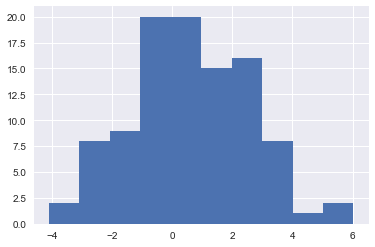

In [32]:
plt.hist(np.random.normal(1,2,101))

In [12]:
def foo(xdata,pars1,pars2,func):
    L1=func(xdata,pars1[0],pars1[1],pars1[2])
    L2=func(xdata,pars2[0],pars2[1],pars2[2])
    return L1 + L2



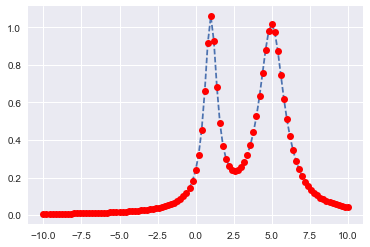

In [15]:
pars_1=[1,1,1]
pars_2=[1,2,5]
Lsum=foo(offsets,pars_1,pars_2,Lorentzian)
plt.plot(offsets,Lsum,'--')
Lsum=Lsum2(offsets,pars_1,pars_2)
plt.plot(offsets,Lsum,'or')

NameError: name 'T2decay' is not defined